# Car Detector

The database used in this notebook is from Aldo von Wangenheim 
https://github.com/awangenh/vision

### Dependencies

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, interact_manual

### Import Image: Street with Cars

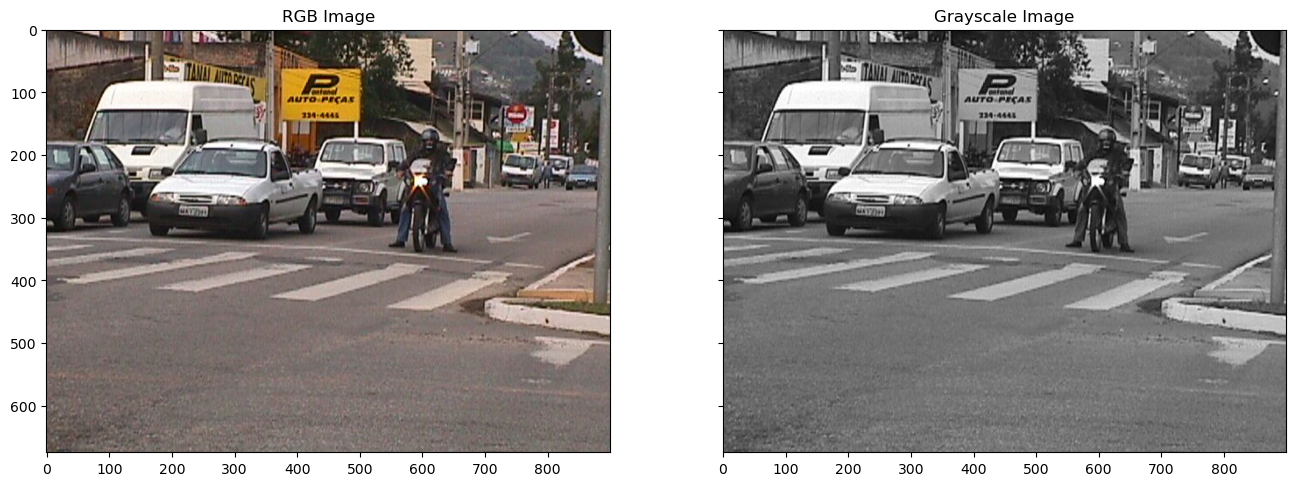

In [16]:
orig = cv2.imread("data/street-01.jpg", cv2.IMREAD_COLOR)
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)

gray = cv2.imread("data/street-01.jpg", cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(1, 2, figsize=(16, 12), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(orig)
ax[0].set_title("RGB Image")

ax[1].imshow(gray, 'gray')
ax[1].set_title("Grayscale Image");

### Import image: Reference Image

The simpliest way to make a car detector is compare frames to a reference image.

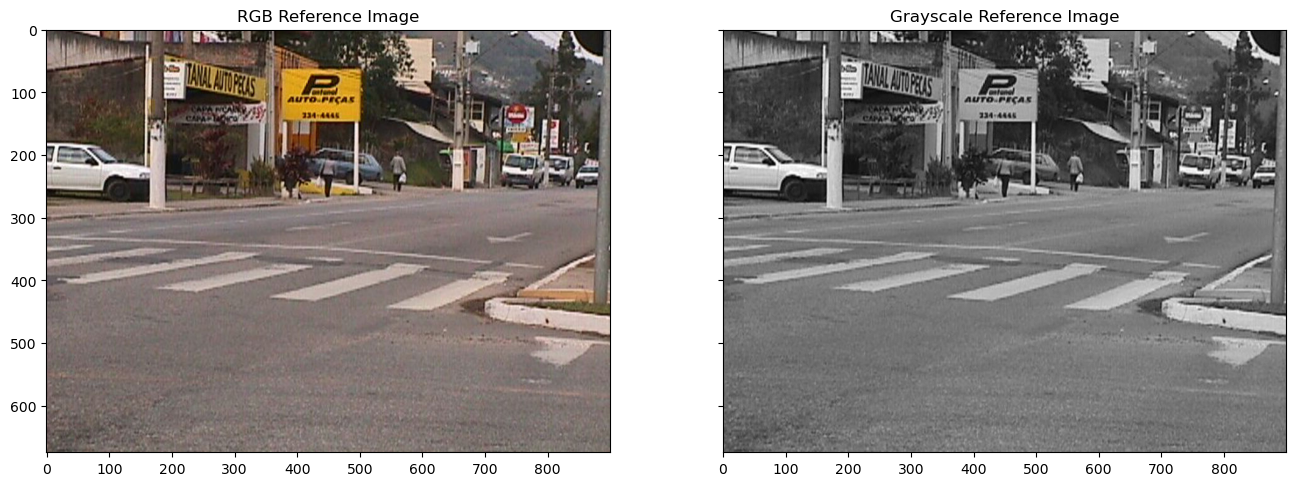

In [17]:
ref_orig = cv2.imread("data/street-00.jpg", cv2.IMREAD_COLOR)
ref_orig = cv2.cvtColor(ref_orig, cv2.COLOR_BGR2RGB)

ref_gray = cv2.imread("data/street-00.jpg", cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(1, 2, figsize=(16, 12), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(ref_orig)
ax[0].set_title("RGB Reference Image")

ax[1].imshow(ref_gray, 'gray')
ax[1].set_title("Grayscale Reference Image");

### Identify what has changed

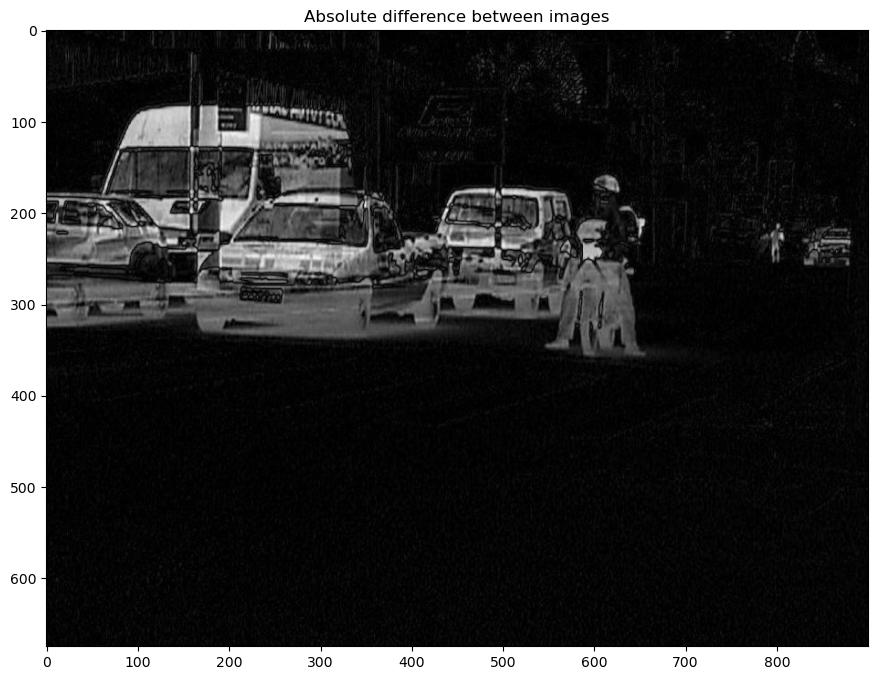

In [24]:
change = cv2.absdiff(gray, ref_gray)

plt.figure(figsize=(12,8))
plt.title("Absolute difference between images")
plt.imshow(change, 'gray');

### Refining the mask with Basic Thresholding Operations

If you closely examine the image above, you will notice a blend of the "Street with cars" image and the reference image, particularly near the tires.

To generate a better mask, we could use threshold operations.

In [27]:
modes = ['cv2.THRESH_BINARY',
         'cv2.THRESH_BINARY_INV',
         'cv2.THRESH_TRUNC',
         'cv2.THRESH_TOZERO',
         'cv2.THRESH_TOZERO_INV']

def my_threshold(thresh, modeStr):
    global change
    global dst
    
    mode = eval(modeStr)
    th, dst = cv2.threshold(change, thresh, 255, mode)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 12), sharex=True, sharey=True)
    ax = axes.ravel()
    ax[0].imshow(change,'gray')
    ax[1].imshow(dst,'gray')

interactive(my_threshold, thresh = (0, 255), modeStr=modes)

interactive(children=(IntSlider(value=127, description='thresh', max=255), Dropdown(description='modeStr', opt…

### Using another approach: Mathematical Morphology

Testing differents types of threshold does not generate a good mask. We are still unable to extract the entire car. To overcome this, we will use morphological operations on the mask generated above.

We will use composite operations Opening and Closing. For that, we will need a kernel (structuring element) to process the operations.

In [28]:
kernel = np.ones((5,5), np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [72]:
kernel2 = np.ones((41,41), np.uint8)

In [73]:
# Opening

opening = cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernel)

In [74]:
# Closing

closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel2)

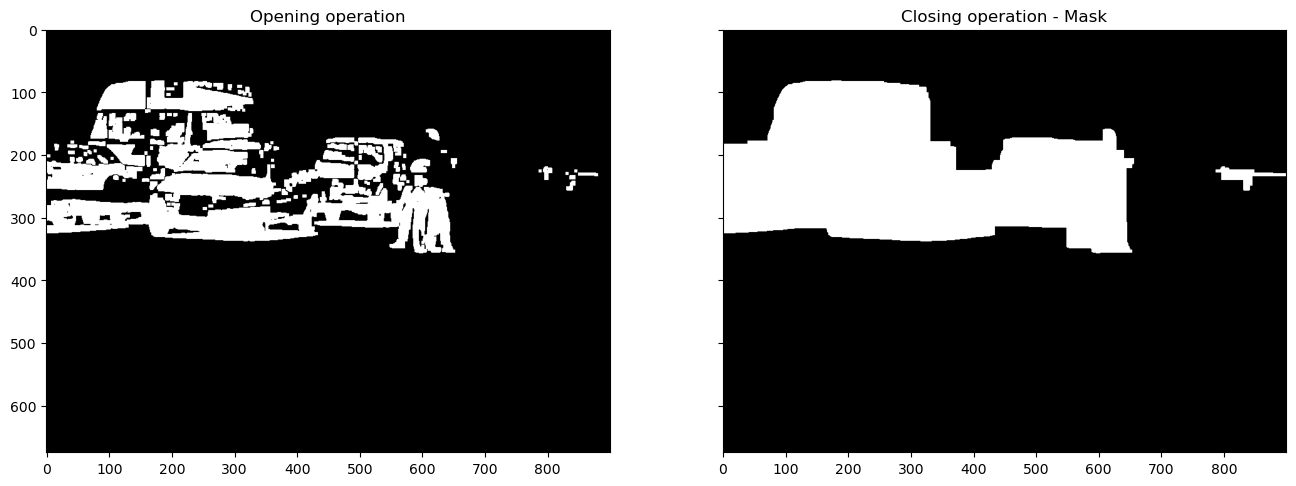

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(16, 12), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(opening, 'gray')
ax[0].set_title("Opening operation")

ax[1].imshow(closing, 'gray')
ax[1].set_title("Closing operation - Mask");

In [76]:
# Extracting cars from image

mask_morpho = cv2.multiply(gray, (closing//255))

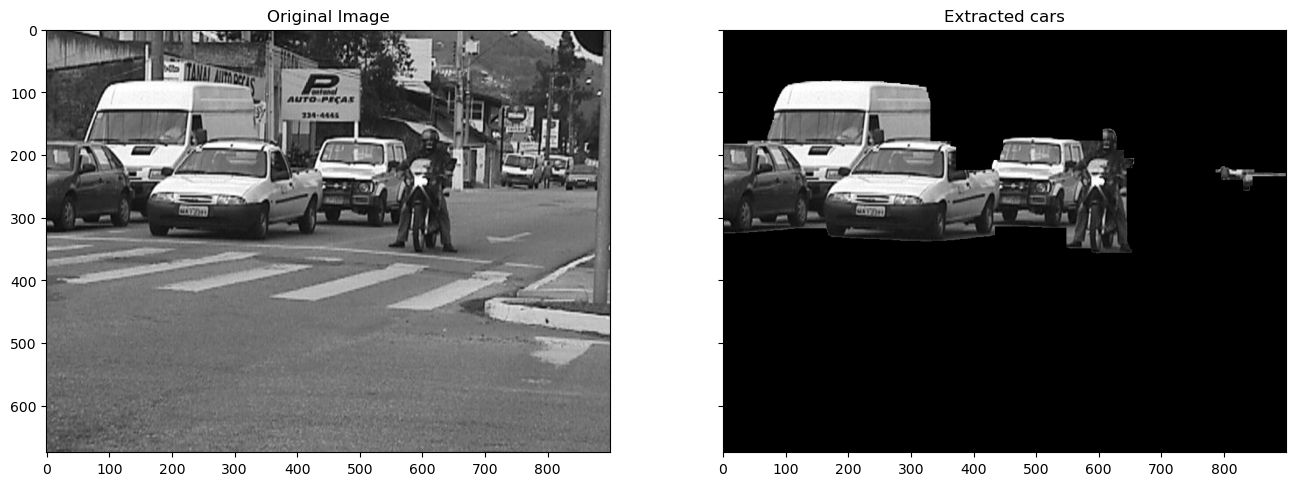

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(16, 12), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(gray, 'gray')
ax[0].set_title("Original Image")

ax[1].imshow(mask_morpho, 'gray')
ax[1].set_title("Extracted cars");